In [70]:
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/user/Desktop/회귀용데이터(수식).csv', engine='python', encoding='CP949')
data.head()

,Unnamed: 0,Unnamed: 0.1,순번,개인법인구분_공통,가중치_공통,[쿼터]업종_공통,[쿼터]종사자_공통,[쿼터]지역_공통,[쿼터]기업성장단계_공통,[쿼터]업력_공통,...,K48_업계내의과당경쟁및덤핑애로_공통,K49_법률회계세무관련지식부족애로_공통,K410_조직관리애로_공통,K411_환율변동애로_공통,K412_특허분쟁애로_공통,K413_각종규제애로_공통,K414_산·학·연간협력활동애로_공통,K415_불공정한시장질서애로_공통,ROE,growth
0,3,3,4,법인,1.831,9,5,2,4,4,...,3,4,3,3,3,3,3,3,3.592233,0.194523
1,7,7,8,법인,3.294,7,5,1,3,3,...,3,3,3,3,3,3,3,3,7.759189,0.273799
2,10,10,11,법인,1.707,8,5,1,3,3,...,4,3,3,3,3,3,3,3,22.383757,0.303955
3,11,11,12,법인,9.188,9,3,1,2,3,...,3,3,3,4,3,4,3,3,-20.508566,0.264120
4,13,13,14,법인,46.129,1,1,1,4,3,...,4,4,4,4,4,4,4,4,2.862736,0.274654


In [ ]:
#회귀분석에 필요한 라이브러리 및 패키지 설치

In [71]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
#한글화 패치 (나눔고딕)

In [72]:
data[['I5_인수합병응할의향_법인']]

,I5_인수합병응할의향_법인
0,2
1,2
2,2
3,2
4,2
...,...
1708,2
1709,2
1710,2
1711,2


In [73]:
re=data.corr(method='pearson')
print(re)

                      Unnamed: 0  Unnamed: 0.1        순번    가중치_공통  [쿼터]업종_공통  \
Unnamed: 0              1.000000      1.000000  1.000000  0.051109  -0.173945   
Unnamed: 0.1            1.000000      1.000000  1.000000  0.051109  -0.173945   
순번                      1.000000      1.000000  1.000000  0.051109  -0.173945   
가중치_공통                  0.051109      0.051109  0.051109  1.000000   0.027115   
[쿼터]업종_공통              -0.173945     -0.173945 -0.173945  0.027115   1.000000   
...                          ...           ...       ...       ...        ...   
K413_각종규제애로_공통         -0.018326     -0.018326 -0.018326 -0.012731  -0.067138   
K414_산·학·연간협력활동애로_공통   -0.066983     -0.066983 -0.066983 -0.007318   0.118888   
K415_불공정한시장질서애로_공통     -0.059458     -0.059458 -0.059458  0.015257   0.101352   
ROE                    -0.018420     -0.018420 -0.018420  0.038384   0.021836   
growth                  0.213258      0.213258  0.213258  0.195121  -0.016103   

                      [쿼터]종

In [74]:
a = data[['growth','B28_창업시관련분야실무경험년수_공통','B29_창업주과거창업경험여부_공통','C11_2018년기준_정규직_합계_공통','C12_2018년기준_비정규직_합계_공통','C13_2018년기준_총종사자_합계_공통','C2_총종사자수_관리_공통','C4_예상신규채용_2020년_채용인원_공통']]

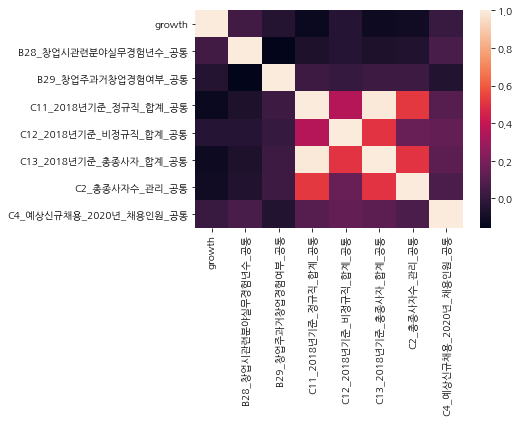

In [75]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [ ]:
#성장률에 관해서 heatmap차트로 상관관계 행렬을 그림

In [8]:
re=a.corr(method='pearson')
print(re)

                           growth  B28_창업시관련분야실무경험년수_공통  B29_창업주과거창업경험여부_공통  \
growth                   1.000000              0.029673           -0.045070   
B28_창업시관련분야실무경험년수_공통     0.029673              1.000000           -0.122391   
B29_창업주과거창업경험여부_공통      -0.045070             -0.122391            1.000000   
C11_2018년기준_정규직_합계_공통   -0.080136             -0.080253            0.030881   
C12_2018년기준_비정규직_합계_공통  -0.027621             -0.044387            0.010275   
C13_2018년기준_총종사자_합계_공통  -0.078861             -0.081821            0.030327   
C2_총종사자수_관리_공통          -0.069228             -0.067749            0.035847   
C4_예상신규채용_2020년_채용인원_공통  0.001128              0.054586           -0.045811   

                         C11_2018년기준_정규직_합계_공통  C12_2018년기준_비정규직_합계_공통  \
growth                               -0.080136               -0.027621   
B28_창업시관련분야실무경험년수_공통                 -0.080253               -0.044387   
B29_창업주과거창업경험여부_공통                    0.030881                0.01

In [9]:
model_1= smf.ols(formula = 'growth~B28_창업시관련분야실무경험년수_공통+B29_창업주과거창업경험여부_공통+C2_총종사자수_영업_공통+C2_총종사자수_RnD_공통+C3_학력별인력구성비_고졸이하_법인+C3_학력별인력구성비_전문대졸_법인+C3_학력별인력구성비_대졸_법인+C3_학력별인력구성비_석사_법인+C3_학력별인력구성비_박사_법인+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D1_지분_벤처캐피털_법인+D51_RnD_경험여부_공통+D7_투자액_RnD_법인+E21_등록보유_합계_공통+I5_인수합병응할의향_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.063
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           5.77e-08
Time:                        23:23:27   Log-Likelihood:                -800.67
No. Observations:                1171   AIC:                             1637.
Df Residuals:                    1153   BIC:                             1729.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.8382      5.599     -0.685      0.493     -14.824       7.148
B28_창업시관련분야실무경험년수_공통     0.0028      0.002      1.452      0.147      -0.001       0.007
B29_창업주과거창업경험여부_공통      -0.0224      0.037     -0.607      0.544      -0.095       0.050
C2_총종사자수_영업_공통          -0.0011      0.001     -2.127      0.034      -0.002   -8.62e-05
C2_총종사자수_RnD_공통         -0.0002      0.000     -0.597      0.551      -0.001       0.000
C3_학력별인력구성비_고졸이하_법인      0.0408      0.056      0.730      0.466      -0.069       0.150
C3_학력별인력구성비_전문대졸_법인      0.0407      0.056      0.728      0.467      -0.069       0.150
C3_학력별인력구성비_대졸_법인        0.0421      0.056      0.754      0.451      -0.068       0.152
C3_학력별인력구성비_석사_법인        0.0459      0.056      0.821      0.412      -0.064       0.156
C3_학력별인력구성비_박사_법인        0.0459      0.056      0.818      0.414      -0.064       0.156
C4_예상신규채용_채용인원합계_공통      0.0016      0.002      0.862      0.389      -0.002       0.005
D1_지분_창업자_법인             0.0019      0.001      3.764      0.000       0.001       0.003
D1_지분_임직원_법인             0.0017      0.001      2.905      0.004       0.001       0.003
D1_지분_벤처캐피털_법인           0.0007      0.001      0.575      0.565      -0.002       0.003
D51_RnD_경험여부_공통          0.0191      0.037      0.519      0.604      -0.053       0.091
D7_투자액_RnD_법인        -1.991e-05   8.57e-06     -2.323      0.020   -3.67e-05   -3.09e-06
E21_등록보유_합계_공통          -0.0005      0.000     -1.201      0.230      -0.001       0.000
I5_인수합병응할의향_법인          -0.0109      0.047     -0.234      0.815      -0.103       0.081
==============================================================================
Omnibus:                     1270.584   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96921.097
Skew:                           5.259   Prob(JB):                         0.00
Kurtosis:                      46.311   Cond. No.                     8.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#종속변수 growth에 관해 모든 변수를 독립변수로 넣고 휘귀분석을 실시함

In [11]:
model_1= smf.ols(formula = 'growth~B28_창업시관련분야실무경험년수_공통+C2_총종사자수_영업_공통+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D7_투자액_RnD_법인+E21_등록보유_합계_공통', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.474
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.33e-06
Time:                        09:41:38   Log-Likelihood:                -815.75
No. Observations:                1171   AIC:                             1648.
Df Residuals:                    1163   BIC:                             1688.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3584      0.043      8.330      0.000       0.274       0.443
B28_창업시관련분야실무경험년수_공통     0.0024      0.002      1.281      0.200      -0.001       0.006
C2_총종사자수_영업_공통          -0.0012      0.001     -2.322      0.020      -0.002      -0.000
C4_예상신규채용_채용인원합계_공통      0.0008      0.002      0.431      0.667      -0.003       0.004
D1_지분_창업자_법인             0.0017      0.000      3.574      0.000       0.001       0.003
D1_지분_임직원_법인             0.0016      0.001      2.871      0.004       0.001       0.003
D7_투자액_RnD_법인        -1.582e-05   8.06e-06     -1.962      0.050   -3.16e-05   -7.35e-10
E21_등록보유_합계_공통          -0.0005      0.000     -1.261      0.208      -0.001       0.000
==============================================================================
Omnibus:                     1249.957   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84949.618
Skew:                           5.161   Prob(JB):                         0.00
Kurtosis:                      43.429   Cond. No.                     6.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_1= smf.ols(formula = 'growth~C2_총종사자수_영업_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D7_투자액_RnD_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.984
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.52e-07
Time:                        09:41:39   Log-Likelihood:                -1190.1
No. Observations:                1713   AIC:                             2390.
Df Residuals:                    1708   BIC:                             2417.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3560      0.030     11.802      0.000       0.297       0.415
C2_총종사자수_영업_공통    -0.0007      0.000     -2.091      0.037      -0.001   -4.45e-05
D1_지분_창업자_법인       0.0015      0.000      3.856      0.000       0.001       0.002
D1_지분_임직원_법인       0.0017      0.000      3.848      0.000       0.001       0.003
D7_투자액_RnD_법인  -1.448e-05   6.93e-06     -2.089      0.037   -2.81e-05   -8.85e-07
==============================================================================
Omnibus:                     2096.609   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289806.836
Skew:                           6.397   Prob(JB):                         0.00
Kurtosis:                      65.423   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#회귀계수 및 모델의 P값이 유의하므로 모델로 선정

In [67]:
a = data[['growth','C2_총종사자수_영업_공통','D1_지분_창업자_법인','D1_지분_임직원_법인','D7_투자액_RnD_법인']]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


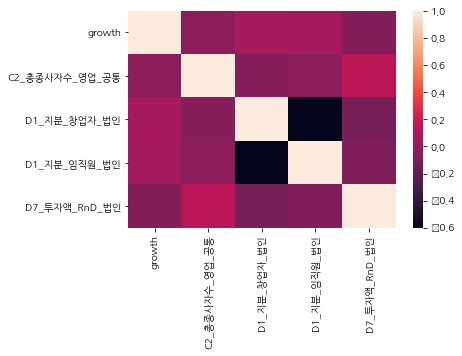

In [68]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [69]:
re=a.corr(method='pearson')
print(re)

                  growth  C2_총종사자수_영업_공통  D1_지분_창업자_법인  D1_지분_임직원_법인  \
growth          1.000000       -0.042931      0.056522      0.052520   
C2_총종사자수_영업_공통 -0.042931        1.000000     -0.057794     -0.032989   
D1_지분_창업자_법인    0.056522       -0.057794      1.000000     -0.601813   
D1_지분_임직원_법인    0.052520       -0.032989     -0.601813      1.000000   
D7_투자액_RnD_법인  -0.082190        0.135842     -0.115320     -0.084417   

                D7_투자액_RnD_법인  
growth              -0.082190  
C2_총종사자수_영업_공통       0.135842  
D1_지분_창업자_법인        -0.115320  
D1_지분_임직원_법인        -0.084417  
D7_투자액_RnD_법인        1.000000  


In [70]:
y,x=dmatrices('growth~C2_총종사자수_영업_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D7_투자액_RnD_법인',data,return_type='dataframe')

In [71]:
vif=pd.DataFrame()

In [72]:
y,x=dmatrices('growth~C2_총종사자수_영업_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D7_투자액_RnD_법인',data,return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif



,VIF Factor,features
0,6.613939,Intercept
1,1.024536,C2_총종사자수_영업_공통
2,1.647719,D1_지분_창업자_법인
3,1.635251,D1_지분_임직원_법인
4,1.067533,D7_투자액_RnD_법인


In [ ]:
#다중공선성 확인을 위해 pasty패키지의 전처리 과정을 들고와서 실행

In [13]:
model_1= smf.ols(formula = 'C2_총종사자수_합계_공통~B28_창업시관련분야실무경험년수_공통+B29_창업주과거창업경험여부_공통+C11_2018년기준_정규직_합계_공통+C12_2018년기준_비정규직_합계_공통+C13_2018년기준_총종사자_합계_공통+C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+C2_총종사자수_영업_공통+C2_총종사자수_RnD_공통+C3_학력별인력구성비_고졸이하_법인+C3_학력별인력구성비_전문대졸_법인+C3_학력별인력구성비_대졸_법인+C3_학력별인력구성비_석사_법인+C3_학력별인력구성비_박사_법인+C4_예상신규채용_신규채용의사_공통+C4_예상신규채용_2019년하반기_채용인원_공통+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D1_지분_벤처캐피털_법인+D51_RnD_경험여부_공통+D52_융자_경험여부_공통+D53_보증서지원_경험여부_공통+D6_신규자금조달규모_법인+D6_신규자금조달_정부지원금_법인+D6_신규자금조달_합계_법인+D7_투자액_RnD_법인+D7_투자액_합계_법인+E21_등록보유_합계_공통+G11_자체브랜드보유개수_공통+G31_국내시장점유율_법인+G32_글로벌시장점유율_법인+I3_밴처캐피탈투자받은경험_법인+I4_인수합병의향_법인+I5_인수합병응할의향_법인+K32_향후사회적책임실천할계획여부_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         C2_총종사자수_합계_공통   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.497e+26
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:12:07   Log-Likelihood:                 11582.
No. Observations:                 477   AIC:                        -2.310e+04
Df Residuals:                     443   BIC:                        -2.295e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   7.092e-15   1.32e-14      0.539      0.590   -1.88e-14     3.3e-14
B28_창업시관련분야실무경험년수_공통        4.063e-14   4.51e-14      0.900      0.369   -4.81e-14    1.29e-13
B29_창업주과거창업경험여부_공통          1.981e-13   8.01e-13      0.247      0.805   -1.38e-12    1.77e-12
C11_2018년기준_정규직_합계_공통          0.3333   1.83e-14   1.82e+13      0.000       0.333       0.333
C12_2018년기준_비정규직_합계_공통         0.3333   3.07e-14   1.08e+13      0.000       0.333       0.333
C13_2018년기준_총종사자_합계_공통         0.6667   1.95e-14   3.42e+13      0.000       0.667       0.667
C2_총종사자수_관리_공통              1.354e-14   3.29e-14      0.412      0.680    -5.1e-14    7.81e-14
C2_총종사자수_생산_공통              1.066e-14   2.58e-14      0.413      0.680      -4e-14    6.13e-14
C2_총종사자수_영업_공통              8.132e-15   2.94e-14      0.277      0.782   -4.96e-14    6.58e-14
C2_총종사자수_RnD_공통             6.384e-15    2.7e-14      0.236      0.813   -4.67e-14    5.95e-14
C3_학력별인력구성비_고졸이하_법인        -7.105e-13   1.31e-12     -0.541      0.589   -3.29e-12    1.87e-12
C3_학력별인력구성비_전문대졸_법인         -7.15e-13   1.31e-12     -0.545      0.586   -3.29e-12    1.86e-12
C3_학력별인력구성비_대졸_법인          -7.025e-13   1.31e-12     -0.535      0.593   -3.28e-12    1.88e-12
C3_학력별인력구성비_석사_법인           -7.15e-13   1.31e-12     -0.545      0.586    -3.3e-12    1.87e-12
C3_학력별인력구성비_박사_법인          -6.919e-13   1.32e-12     -0.523      0.601   -3.29e-12    1.91e-12
C4_예상신규채용_신규채용의사_공통         1.543e-14   1.32e-14      1.172      0.242   -1.04e-14    4.13e-14
C4_예상신규채용_2019년하반기_채용인원_공통 -1.377e-14   2.61e-13     -0.053      0.958   -5.26e-13    4.98e-13
C4_예상신규채용_채용인원합계_공통         7.661e-15   1.11e-13      0.069      0.945    -2.1e-13    2.25e-13
D1_지분_창업자_법인                2.384e-15   1.36e-14      0.175      0.861   -2.44e-14    2.91e-14
D1_지분_임직원_법인                2.557e-15   1.52e-14      0.168      0.866   -2.73e-14    3.24e-14
D1_지분_벤처캐피털_법인             -6.634e-15   3.35e-14     -0.198      0.843   -7.24e-14    5.92e-14
D51_RnD_경험여부_공통            -5.063e-14   8.37e-13     -0.060      0.952    -1.7e-12    1.59e-12
D52_융자_경험여부_공통             -8.638e-14   7.31e-13     -0.118      0.906   -1.52e-12    1.35e-12
D53_보증서지원_경험여부_공통           -3.02e-14   7.35e-13     -0.041      0.967   -1.47e-12    1.41e-12
D6_신규자금조달규모_법인              2.563e-16   6.39e-17      4.008      0.000    1.31e-16    3.82e-16
D6_신규자금조달_정부지원금_법인          6.939e-16   9.85e-15      0.070      0.944   -1.87e-14    2.01e-14
D6_신규자금조달_합계_법인              7.07e-13   1.32e-12      0.537      0.592   -1.88e-12    3.29e-12
D7_투자액_RnD_법인              -3.319e-15   1.77e-16    -18.731      0.000   -3.67e-15   -2.97e-15
D7_투자액_합계_법인                6.854e-16   7.48e-17      9.167      0.000    5.38e-16    8.32e-16
E21_등록보유_합계_공통             -4.996e-16   1.0

In [ ]:
#총종사자수_합계를 종속변수로 잡고 모든 독립변수를 넣어 다중회귀분석을 실시함 

In [89]:
model_1= smf.ols(formula = 'C2_총종사자수_합계_공통~D7_투자액_RnD_법인+D7_투자액_합계_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         C2_총종사자수_합계_공통   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.19e-49
Time:                        14:20:50   Log-Likelihood:                -8689.2
No. Observations:                1438   AIC:                         1.738e+04
Df Residuals:                    1435   BIC:                         1.740e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0044      0.000     15.154      0.000       0.004       0.005
D6_신규자금조달_합계_법인     0.4450      0.029     15.154      0.000       0.387       0.503
D7_투자액_RnD_법인       0.0163      0.002      9.002      0.000       0.013       0.020
D7_투자액_합계_법인        0.0044      0.001      5.662      0.000       0.003       0.006
==============================================================================
Omnibus:                     2375.958   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2388106.472
Skew:                          10.378   Prob(JB):                         0.00
Kurtosis:                     201.561   Cond. No.                     3.18e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#종속변수 총종사자수_합계에 관해 회귀분석을 실시하고 회귀계수들의 P값과 모델의 P값이 유의하여 모델로 선정

In [109]:
a = data[['C2_총종사자수_합계_공통','D7_투자액_RnD_법인','D7_투자액_합계_법인']]

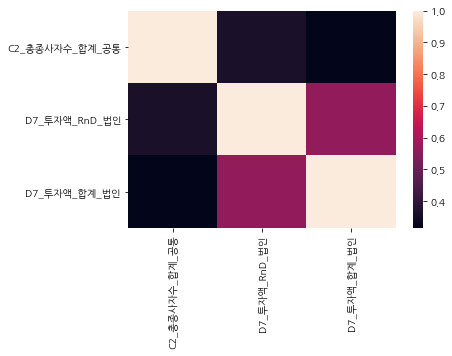

In [110]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [96]:
re=a.corr(method='pearson')
print(re)

                C2_총종사자수_합계_공통  D7_투자액_RnD_법인  D7_투자액_합계_법인
C2_총종사자수_합계_공통        1.000000       0.361545      0.315169
D7_투자액_RnD_법인         0.361545       1.000000      0.565512
D7_투자액_합계_법인          0.315169       0.565512      1.000000


In [123]:
y,x=dmatrices('C2_총종사자수_합계_공통~D7_투자액_RnD_법인+D7_투자액_합계_법인',data,return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,VIF Factor,features
0,1.191570,Intercept
1,1.470164,D7_투자액_RnD_법인
2,1.470164,D7_투자액_합계_법인


In [ ]:
#모델의 다중공선성 확인을 위해 확인 함

In [16]:
model_1= smf.ols(formula = 'C3_학력별인력구성비_석사_법인~B28_창업시관련분야실무경험년수_공통+B29_창업주과거창업경험여부_공통+C11_2018년기준_정규직_합계_공통+C12_2018년기준_비정규직_합계_공통+C13_2018년기준_총종사자_합계_공통+C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+C2_총종사자수_영업_공통+C2_총종사자수_RnD_공통+C3_학력별인력구성비_고졸이하_법인+C3_학력별인력구성비_전문대졸_법인+C3_학력별인력구성비_대졸_법인+C3_학력별인력구성비_석사_법인+C3_학력별인력구성비_박사_법인+C4_예상신규채용_신규채용의사_공통+C4_예상신규채용_2019년하반기_채용인원_공통+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D1_지분_벤처캐피털_법인+D51_RnD_경험여부_공통+D52_융자_경험여부_공통+D53_보증서지원_경험여부_공통+D6_신규자금조달규모_법인+D6_신규자금조달_정부지원금_법인+D6_신규자금조달_합계_법인+D7_투자액_RnD_법인+D7_투자액_합계_법인+E21_등록보유_합계_공통+G11_자체브랜드보유개수_공통+G31_국내시장점유율_법인+G32_글로벌시장점유율_법인+I3_밴처캐피탈투자받은경험_법인+I4_인수합병의향_법인+I5_인수합병응할의향_법인+K32_향후사회적책임실천할계획여부_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      C3_학력별인력구성비_석사_법인   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.442e+27
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:27:51   Log-Likelihood:                 12438.
No. Observations:                 477   AIC:                        -2.481e+04
Df Residuals:                     443   BIC:                        -2.467e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -3.306e-15   2.19e-15     -1.511      0.131   -7.61e-15    9.93e-16
B28_창업시관련분야실무경험년수_공통       -4.296e-14    7.5e-15     -5.727      0.000   -5.77e-14   -2.82e-14
B29_창업주과거창업경험여부_공통         -1.233e-12   1.33e-13     -9.266      0.000   -1.49e-12   -9.71e-13
C11_2018년기준_정규직_합계_공통       9.779e-13   3.04e-15    321.900      0.000    9.72e-13    9.84e-13
C12_2018년기준_비정규직_합계_공통       9.47e-13   5.11e-15    185.407      0.000    9.37e-13    9.57e-13
C13_2018년기준_총종사자_합계_공통     -9.756e-13   3.24e-15   -301.065      0.000   -9.82e-13   -9.69e-13
C2_총종사자수_관리_공통              6.939e-17   5.46e-15      0.013      0.990   -1.07e-14    1.08e-14
C2_총종사자수_생산_공통             -5.787e-15   4.29e-15     -1.350      0.178   -1.42e-14    2.64e-15
C2_총종사자수_영업_공통              -8.49e-15   4.88e-15     -1.741      0.082   -1.81e-14     1.1e-15
C2_총종사자수_RnD_공통             4.061e-15   4.49e-15      0.904      0.366   -4.77e-15    1.29e-14
C3_학력별인력구성비_고졸이하_법인         3.009e-13   2.18e-13      1.378      0.169   -1.28e-13     7.3e-13
C3_학력별인력구성비_전문대졸_법인         3.082e-13   2.18e-13      1.414      0.158    -1.2e-13    7.36e-13
C3_학력별인력구성비_대졸_법인           3.004e-13   2.18e-13      1.378      0.169   -1.28e-13    7.29e-13
C3_학력별인력구성비_석사_법인              1.0000   2.18e-13   4.58e+12      0.000       1.000       1.000
C3_학력별인력구성비_박사_법인           2.662e-13    2.2e-13      1.212      0.226   -1.65e-13    6.98e-13
C4_예상신규채용_신규채용의사_공통         6.506e-13   2.19e-15    297.417      0.000    6.46e-13    6.55e-13
C4_예상신규채용_2019년하반기_채용인원_공통 -1.008e-14   4.33e-14     -0.233      0.816   -9.52e-14     7.5e-14
C4_예상신규채용_채용인원합계_공통         1.214e-14   1.84e-14      0.660      0.510    -2.4e-14    4.83e-14
D1_지분_창업자_법인               -2.413e-15   2.26e-15     -1.066      0.287   -6.86e-15    2.03e-15
D1_지분_임직원_법인               -3.535e-15   2.53e-15     -1.400      0.162    -8.5e-15    1.43e-15
D1_지분_벤처캐피털_법인             -2.944e-15   5.56e-15     -0.529      0.597   -1.39e-14    7.99e-15
D51_RnD_경험여부_공통             2.491e-13   1.39e-13      1.791      0.074   -2.42e-14    5.22e-13
D52_융자_경험여부_공통             -1.382e-13   1.22e-13     -1.137      0.256   -3.77e-13    1.01e-13
D53_보증서지원_경험여부_공통           4.713e-14   1.22e-13      0.386      0.700   -1.93e-13    2.87e-13
D6_신규자금조달규모_법인              4.429e-17   1.06e-17      4.169      0.000    2.34e-17    6.52e-17
D6_신규자금조달_정부지원금_법인          3.027e-16   1.64e-15      0.185      0.853   -2.91e-15    3.52e-15
D6_신규자금조달_합계_법인            -2.824e-13   2.19e-13     -1.291      0.197   -7.12e-13    1.47e-13
D7_투자액_RnD_법인              -3.913e-16   2.94e-17    -13.290      0.000   -4.49e-16   -3.33e-16
D7_투자액_합계_법인                9.676e-17   1.24e-17      7.788      0.000    7.23e-17    1.21e-16
E21_등록보유_합계_공통              2.574e-15   1.6

In [102]:
model_1= smf.ols(formula = 'C3_학력별인력구성비_석사_법인~C3_학력별인력구성비_박사_법인+D51_RnD_경험여부_공통+D7_투자액_RnD_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      C3_학력별인력구성비_석사_법인   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.73e-68
Time:                        14:23:54   Log-Likelihood:                -6222.1
No. Observations:                1713   AIC:                         1.245e+04
Df Residuals:                    1709   BIC:                         1.247e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.9728      1.069     13.072      0.000      11.876      16.069
C3_학력별인력구성비_박사_법인     0.4787      0.034     13.973      0.000       0.412       0.546
D51_RnD_경험여부_공통      -5.0547      0.568     -8.906      0.000      -6.168      -3.942
D7_투자액_RnD_법인         0.0004      0.000      3.082      0.002       0.000       0.001
==============================================================================
Omnibus:                     1063.581   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18639.018
Skew:                           2.594   Prob(JB):                         0.00
Kurtosis:                      18.304   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
a = data[['C3_학력별인력구성비_석사_법인','C3_학력별인력구성비_박사_법인','D51_RnD_경험여부_공통','D7_투자액_RnD_법인']]

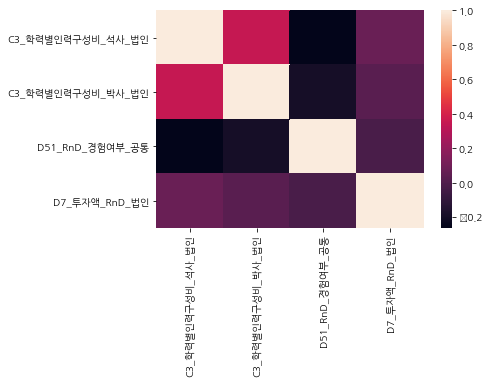

In [112]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [113]:
re=a.corr(method='pearson')
print(re)

                   C3_학력별인력구성비_석사_법인  C3_학력별인력구성비_박사_법인  D51_RnD_경험여부_공통  \
C3_학력별인력구성비_석사_법인           1.000000           0.354373        -0.260755   
C3_학력별인력구성비_박사_법인           0.354373           1.000000        -0.190146   
D51_RnD_경험여부_공통            -0.260755          -0.190146         1.000000   
D7_투자액_RnD_법인               0.081677           0.034181        -0.014723   

                   D7_투자액_RnD_법인  
C3_학력별인력구성비_석사_법인       0.081677  
C3_학력별인력구성비_박사_법인       0.034181  
D51_RnD_경험여부_공통        -0.014723  
D7_투자액_RnD_법인           1.000000  


In [124]:
y,x=dmatrices('C3_학력별인력구성비_석사_법인~C3_학력별인력구성비_박사_법인+D51_RnD_경험여부_공통+D7_투자액_RnD_법인',data,return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,VIF Factor,features
0,23.340168,Intercept
1,1.038573,C3_학력별인력구성비_박사_법인
2,1.037585,D51_RnD_경험여부_공통
3,1.001240,D7_투자액_RnD_법인


In [22]:
model_1= smf.ols(formula = 'C41_신규채용희망학력_합계_법인~B28_창업시관련분야실무경험년수_공통+B29_창업주과거창업경험여부_공통+C11_2018년기준_정규직_합계_공통+C12_2018년기준_비정규직_합계_공통+C13_2018년기준_총종사자_합계_공통+C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+C2_총종사자수_영업_공통+C2_총종사자수_RnD_공통+C3_학력별인력구성비_고졸이하_법인+C3_학력별인력구성비_전문대졸_법인+C3_학력별인력구성비_대졸_법인+C3_학력별인력구성비_석사_법인+C3_학력별인력구성비_박사_법인+C4_예상신규채용_신규채용의사_공통+C4_예상신규채용_2019년하반기_채용인원_공통+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D1_지분_벤처캐피털_법인+D51_RnD_경험여부_공통+D52_융자_경험여부_공통+D53_보증서지원_경험여부_공통+D6_신규자금조달규모_법인+D6_신규자금조달_정부지원금_법인+D6_신규자금조달_합계_법인+D7_투자액_RnD_법인+D7_투자액_합계_법인+E21_등록보유_합계_공통+G11_자체브랜드보유개수_공통+G31_국내시장점유율_법인+G32_글로벌시장점유율_법인+I3_밴처캐피탈투자받은경험_법인+I4_인수합병의향_법인+I5_인수합병응할의향_법인+K32_향후사회적책임실천할계획여부_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     C41_신규채용희망학력_합계_법인   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1707.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:35:24   Log-Likelihood:                -361.94
No. Observations:                 477   AIC:                             791.9
Df Residuals:                     443   BIC:                             933.6
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.814e-05      0.001      0.018      0.985      -0.002       0.002
B28_창업시관련분야실무경험년수_공통          -0.0010      0.003     -0.291      0.771      -0.008       0.006
B29_창업주과거창업경험여부_공통            -0.0217      0.060     -0.362      0.718      -0.140       0.096
C11_2018년기준_정규직_합계_공통          0.0016      0.001      1.201      0.231      -0.001       0.004
C12_2018년기준_비정규직_합계_공통        -0.0019      0.002     -0.815      0.416      -0.006       0.003
C13_2018년기준_총종사자_합계_공통        -0.0002      0.001     -0.159      0.874      -0.003       0.003
C2_총종사자수_관리_공통                -0.0059      0.002     -2.397      0.017      -0.011      -0.001
C2_총종사자수_생산_공통                -0.0078      0.002     -4.032      0.000      -0.012      -0.004
C2_총종사자수_영업_공통                -0.0013      0.002     -0.583      0.560      -0.006       0.003
C2_총종사자수_RnD_공통               -0.0016      0.002     -0.803      0.423      -0.006       0.002
C3_학력별인력구성비_고졸이하_법인            0.0022      0.098      0.023      0.982      -0.191       0.196
C3_학력별인력구성비_전문대졸_법인            0.0018      0.098      0.018      0.985      -0.191       0.195
C3_학력별인력구성비_대졸_법인              0.0016      0.098      0.016      0.987      -0.192       0.195
C3_학력별인력구성비_석사_법인              0.0018      0.098      0.019      0.985      -0.192       0.195
C3_학력별인력구성비_박사_법인          -4.927e-05      0.099     -0.000      1.000      -0.195       0.195
C4_예상신규채용_신규채용의사_공통         1.814e-05      0.001      0.018      0.985      -0.002       0.002
C4_예상신규채용_2019년하반기_채용인원_공통    -0.0271      0.020     -1.389      0.166      -0.066       0.011
C4_예상신규채용_채용인원합계_공통            1.0011      0.008    120.598      0.000       0.985       1.017
D1_지분_창업자_법인                  -0.0006      0.001     -0.582      0.561      -0.003       0.001
D1_지분_임직원_법인                  -0.0017      0.001     -1.509      0.132      -0.004       0.001
D1_지분_벤처캐피털_법인                 0.0008      0.003      0.338      0.735      -0.004       0.006
D51_RnD_경험여부_공통               -0.0166      0.063     -0.264      0.792      -0.140       0.107
D52_융자_경험여부_공통                -0.0580      0.055     -1.058      0.290      -0.166       0.050
D53_보증서지원_경험여부_공통             -0.0423      0.055     -0.767      0.443      -0.151       0.066
D6_신규자금조달규모_법인              4.994e-06   4.79e-06      1.042      0.298   -4.43e-06    1.44e-05
D6_신규자금조달_정부지원금_법인            -0.0002      0.001     -0.325      0.745      -0.002       0.001
D6_신규자금조달_합계_법인                0.0018      0.099      0.018      0.985      -0.192       0.196
D7_투자액_RnD_법인               9.589e-06   1.33e-05      0.722      0.471   -1.65e-05    3.57e-05
D7_투자액_합계_법인               -6.143e-07   5.61e-06     -0.110      0.913   -1.16e-05    1.04e-05
E21_등록보유_합계_공통                 0.0018      

In [24]:
model_1= smf.ols(formula = 'C41_신규채용희망학력_합계_법인~C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+E21_등록보유_합계_공통+G31_국내시장점유율_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     C41_신규채용희망학력_합계_법인   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     25.98
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.17e-20
Time:                        10:40:48   Log-Likelihood:                -4018.4
No. Observations:                1171   AIC:                             8047.
Df Residuals:                    1166   BIC:                             8072.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0474      0.316     12.800      0.000       3.427       4.668
C2_총종사자수_관리_공통     0.0429      0.010      4.118      0.000       0.022       0.063
C2_총종사자수_생산_공통     0.0493      0.008      6.428      0.000       0.034       0.064
E21_등록보유_합계_공통     0.0122      0.006      2.065      0.039       0.001       0.024
G31_국내시장점유율_법인     0.0285      0.011      2.686      0.007       0.008       0.049
==============================================================================
Omnibus:                     1486.043   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264187.963
Skew:                           6.578   Prob(JB):                         0.00
Kurtosis:                      75.399   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
a = data[['C41_신규채용희망학력_합계_법인','C2_총종사자수_관리_공통','C2_총종사자수_생산_공통','E21_등록보유_합계_공통','G31_국내시장점유율_법인']]

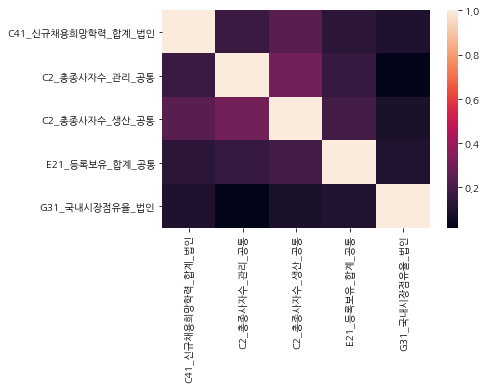

In [115]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [116]:
re=a.corr(method='pearson')
print(re)

                    C41_신규채용희망학력_합계_법인  C2_총종사자수_관리_공통  C2_총종사자수_생산_공통  \
C41_신규채용희망학력_합계_법인            1.000000        0.170459        0.241170   
C2_총종사자수_관리_공통                0.170459        1.000000        0.308072   
C2_총종사자수_생산_공통                0.241170        0.308072        1.000000   
E21_등록보유_합계_공통                0.131447        0.157050        0.192187   
G31_국내시장점유율_법인                0.098736        0.016861        0.088041   

                    E21_등록보유_합계_공통  G31_국내시장점유율_법인  
C41_신규채용희망학력_합계_법인        0.131447        0.098736  
C2_총종사자수_관리_공통            0.157050        0.016861  
C2_총종사자수_생산_공통            0.192187        0.088041  
E21_등록보유_합계_공통            1.000000        0.101810  
G31_국내시장점유율_법인            0.101810        1.000000  


In [125]:
y,x=dmatrices('C41_신규채용희망학력_합계_법인~C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+E21_등록보유_합계_공통+G31_국내시장점유율_법인',data,return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,VIF Factor,features
0,2.081842,Intercept
1,1.062093,C2_총종사자수_관리_공통
2,1.124324,C2_총종사자수_생산_공통
3,1.081726,E21_등록보유_합계_공통
4,1.013499,G31_국내시장점유율_법인


In [ ]:
################################################

In [ ]:
###########################################

In [29]:
model_1= smf.ols(formula = 'E1_공통_4차산업혁명과관계여부_공통~B28_창업시관련분야실무경험년수_공통+B29_창업주과거창업경험여부_공통+C11_2018년기준_정규직_합계_공통+C12_2018년기준_비정규직_합계_공통+C13_2018년기준_총종사자_합계_공통+C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+C2_총종사자수_영업_공통+C2_총종사자수_RnD_공통+C3_학력별인력구성비_고졸이하_법인+C3_학력별인력구성비_전문대졸_법인+C3_학력별인력구성비_대졸_법인+C3_학력별인력구성비_석사_법인+C3_학력별인력구성비_박사_법인+C4_예상신규채용_신규채용의사_공통+C4_예상신규채용_2019년하반기_채용인원_공통+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D1_지분_벤처캐피털_법인+D51_RnD_경험여부_공통+D52_융자_경험여부_공통+D53_보증서지원_경험여부_공통+D6_신규자금조달규모_법인+D6_신규자금조달_정부지원금_법인+D6_신규자금조달_합계_법인+D7_투자액_RnD_법인+D7_투자액_합계_법인+E21_등록보유_합계_공통+G11_자체브랜드보유개수_공통+G31_국내시장점유율_법인+G32_글로벌시장점유율_법인+I3_밴처캐피탈투자받은경험_법인+I4_인수합병의향_법인+I5_인수합병응할의향_법인+K32_향후사회적책임실천할계획여부_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     E1_공통_4차산업혁명과관계여부_공통   R-squared:                       0.128
Model:                              OLS   Adj. R-squared:                  0.063
Method:                   Least Squares   F-statistic:                     1.968
Date:                  Wed, 12 Aug 2020   Prob (F-statistic):            0.00138
Time:                          10:51:24   Log-Likelihood:                -303.51
No. Observations:                   477   AIC:                             675.0
Df Residuals:                       443   BIC:                             816.7
Df Model:                            33                                         
Covariance Type:              nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0011      0.001      1.255      0.210      -0.001       0.003
B28_창업시관련분야실무경험년수_공통           0.0078      0.003      2.591      0.010       0.002       0.014
B29_창업주과거창업경험여부_공통             0.0312      0.053      0.587      0.557      -0.073       0.136
C11_2018년기준_정규직_합계_공통          0.0009      0.001      0.747      0.456      -0.001       0.003
C12_2018년기준_비정규직_합계_공통     -1.127e-05      0.002     -0.006      0.996      -0.004       0.004
C13_2018년기준_총종사자_합계_공통         0.0009      0.001      0.692      0.490      -0.002       0.003
C2_총종사자수_관리_공통                -0.0069      0.002     -3.158      0.002      -0.011      -0.003
C2_총종사자수_생산_공통                -0.0020      0.002     -1.170      0.243      -0.005       0.001
C2_총종사자수_영업_공통                -0.0005      0.002     -0.248      0.804      -0.004       0.003
C2_총종사자수_RnD_공통               -0.0008      0.002     -0.443      0.658      -0.004       0.003
C3_학력별인력구성비_고졸이하_법인           -0.1050      0.087     -1.205      0.229      -0.276       0.066
C3_학력별인력구성비_전문대졸_법인           -0.1078      0.087     -1.239      0.216      -0.279       0.063
C3_학력별인력구성비_대졸_법인             -0.1062      0.087     -1.220      0.223      -0.277       0.065
C3_학력별인력구성비_석사_법인             -0.1059      0.087     -1.216      0.224      -0.277       0.065
C3_학력별인력구성비_박사_법인             -0.1109      0.088     -1.265      0.206      -0.283       0.061
C4_예상신규채용_신규채용의사_공통            0.0011      0.001      1.255      0.210      -0.001       0.003
C4_예상신규채용_2019년하반기_채용인원_공통    -0.0072      0.017     -0.414      0.679      -0.041       0.027
C4_예상신규채용_채용인원합계_공통           -0.0088      0.007     -1.200      0.231      -0.023       0.006
D1_지분_창업자_법인                   0.0005      0.001      0.578      0.564      -0.001       0.002
D1_지분_임직원_법인                9.433e-05      0.001      0.094      0.925      -0.002       0.002
D1_지분_벤처캐피털_법인                 0.0030      0.002      1.355      0.176      -0.001       0.007
D51_RnD_경험여부_공통                0.0752      0.056      1.355      0.176      -0.034       0.184
D52_융자_경험여부_공통                 0.0475      0.049      0.979      0.328      -0.048       0.143
D53_보증서지원_경험여부_공통              0.0438      0.049      0.898      0.370      -0.052       0.140
D6_신규자금조달규모_법인             -4.512e-06   4.24e-06     -1.064      0.288   -1.28e-05    3.82e-06
D6_신규자금조달_정부지원금_법인            -0.0006      0.001     -0.882      0.378      -0.002       0.001
D6_신규자금조달_합계_법인                0.1096      0.087      1.255      0.210      -0.062       0.281
D7_투자액_RnD_법인               6.393e-06   1.18e-05      0.544      0.587   -1.67e-05    2.95e-05
D7_투자액_합계_법인                2.529e-06   4.96e-06      0.510      0.610   -7.22e-06    1.23e-05
E21_등록보유_합계_공통       

In [31]:
model_1= smf.ols(formula = 'E1_공통_4차산업혁명과관계여부_공통~B28_창업시관련분야실무경험년수_공통+C2_총종사자수_관리_공통+D51_RnD_경험여부_공통+E21_등록보유_합계_공통+I3_밴처캐피탈투자받은경험_법인+I5_인수합병응할의향_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     E1_공통_4차산업혁명과관계여부_공통   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     7.726
Date:                  Wed, 12 Aug 2020   Prob (F-statistic):           3.26e-08
Time:                          10:56:51   Log-Likelihood:                -1216.5
No. Observations:                  1713   AIC:                             2447.
Df Residuals:                      1706   BIC:                             2485.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9639      0.106      9.118      0.000       0.757       1.171
B28_창업시관련분야실무경험년수_공통     0.0038      0.002      2.447      0.014       0.001       0.007
C2_총종사자수_관리_공통          -0.0015      0.001     -2.496      0.013      -0.003      -0.000
D51_RnD_경험여부_공통          0.0648      0.031      2.114      0.035       0.005       0.125
E21_등록보유_합계_공통          -0.0005      0.000     -1.676      0.094      -0.001    9.05e-05
I3_밴처캐피탈투자받은경험_법인        0.0727      0.033      2.208      0.027       0.008       0.137
I5_인수합병응할의향_법인           0.1622      0.040      4.086      0.000       0.084       0.240
==============================================================================
Omnibus:                     6713.356   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.441
Skew:                          -0.136   Prob(JB):                     2.06e-56
Kurtosis:                       1.124   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
a = data[['E1_공통_4차산업혁명과관계여부_공통','B28_창업시관련분야실무경험년수_공통','C2_총종사자수_관리_공통','D51_RnD_경험여부_공통','E21_등록보유_합계_공통','I3_밴처캐피탈투자받은경험_법인','I5_인수합병응할의향_법인']]

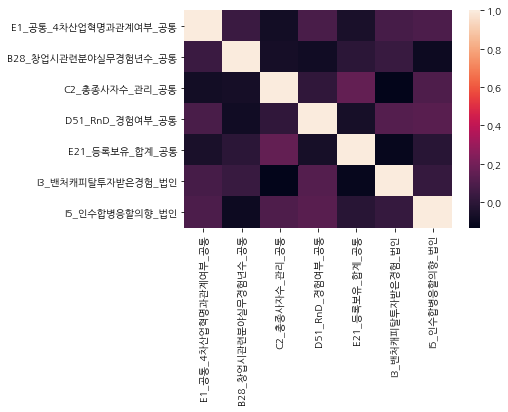

In [118]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [119]:
re=a.corr(method='pearson')
print(re)

                      E1_공통_4차산업혁명과관계여부_공통  B28_창업시관련분야실무경험년수_공통  \
E1_공통_4차산업혁명과관계여부_공통              1.000000              0.041059   
B28_창업시관련분야실무경험년수_공통              0.041059              1.000000   
C2_총종사자수_관리_공통                   -0.077438             -0.067749   
D51_RnD_경험여부_공통                   0.085419             -0.083365   
E21_등록보유_합계_공통                   -0.058353             -0.005389   
I3_밴처캐피탈투자받은경험_법인                 0.077210              0.034849   
I5_인수합병응할의향_법인                    0.095775             -0.097800   

                      C2_총종사자수_관리_공통  D51_RnD_경험여부_공통  E21_등록보유_합계_공통  \
E1_공통_4차산업혁명과관계여부_공통       -0.077438         0.085419       -0.058353   
B28_창업시관련분야실무경험년수_공통       -0.067749        -0.083365       -0.005389   
C2_총종사자수_관리_공통              1.000000         0.010194        0.157050   
D51_RnD_경험여부_공통             0.010194         1.000000       -0.065247   
E21_등록보유_합계_공통              0.157050        -0.065247        1.000000   
I3_밴처캐피탈투자받은경험_법인

In [126]:
y,x=dmatrices('E1_공통_4차산업혁명과관계여부_공통~B28_창업시관련분야실무경험년수_공통+C2_총종사자수_관리_공통+D51_RnD_경험여부_공통+E21_등록보유_합계_공통+I3_밴처캐피탈투자받은경험_법인+I5_인수합병응할의향_법인',data,return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,VIF Factor,features
0,78.688627,Intercept
1,1.023479,B28_창업시관련분야실무경험년수_공통
2,1.051172,C2_총종사자수_관리_공통
3,1.043873,D51_RnD_경험여부_공통
4,1.036180,E21_등록보유_합계_공통
5,1.043367,I3_밴처캐피탈투자받은경험_법인
6,1.033199,I5_인수합병응할의향_법인


In [34]:
model_1= smf.ols(formula = 'G32_글로벌시장점유율_법인~B28_창업시관련분야실무경험년수_공통+B29_창업주과거창업경험여부_공통+C11_2018년기준_정규직_합계_공통+C12_2018년기준_비정규직_합계_공통+C13_2018년기준_총종사자_합계_공통+C2_총종사자수_관리_공통+C2_총종사자수_생산_공통+C2_총종사자수_영업_공통+C2_총종사자수_RnD_공통+C3_학력별인력구성비_고졸이하_법인+C3_학력별인력구성비_전문대졸_법인+C3_학력별인력구성비_대졸_법인+C3_학력별인력구성비_석사_법인+C3_학력별인력구성비_박사_법인+C4_예상신규채용_신규채용의사_공통+C4_예상신규채용_2019년하반기_채용인원_공통+C4_예상신규채용_채용인원합계_공통+D1_지분_창업자_법인+D1_지분_임직원_법인+D1_지분_벤처캐피털_법인+D51_RnD_경험여부_공통+D52_융자_경험여부_공통+D53_보증서지원_경험여부_공통+D6_신규자금조달규모_법인+D6_신규자금조달_정부지원금_법인+D6_신규자금조달_합계_법인+D7_투자액_RnD_법인+D7_투자액_합계_법인+E21_등록보유_합계_공통+G11_자체브랜드보유개수_공통+G31_국내시장점유율_법인+G32_글로벌시장점유율_법인+I3_밴처캐피탈투자받은경험_법인+I4_인수합병의향_법인+I5_인수합병응할의향_법인+K32_향후사회적책임실천할계획여부_법인', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        G32_글로벌시장점유율_법인   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.951e+27
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:59:36   Log-Likelihood:                 12806.
No. Observations:                 477   AIC:                        -2.554e+04
Df Residuals:                     443   BIC:                        -2.540e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -3.86e-16   1.01e-15     -0.381      0.703   -2.37e-15     1.6e-15
B28_창업시관련분야실무경험년수_공통        9.149e-15   3.47e-15      2.637      0.009    2.33e-15     1.6e-14
B29_창업주과거창업경험여부_공통          3.496e-13   6.15e-14      5.680      0.000    2.29e-13     4.7e-13
C11_2018년기준_정규직_합계_공통      -2.138e-16   1.41e-15     -0.152      0.879   -2.98e-15    2.55e-15
C12_2018년기준_비정규직_합계_공통      1.913e-14   2.36e-15      8.097      0.000    1.45e-14    2.38e-14
C13_2018년기준_총종사자_합계_공통     -3.358e-15    1.5e-15     -2.240      0.026    -6.3e-15   -4.12e-16
C2_총종사자수_관리_공통               2.05e-15   2.53e-15      0.812      0.417   -2.91e-15    7.01e-15
C2_총종사자수_생산_공통               3.74e-15   1.98e-15      1.887      0.060   -1.56e-16    7.64e-15
C2_총종사자수_영업_공통               4.41e-15   2.26e-15      1.955      0.051   -2.42e-17    8.84e-15
C2_총종사자수_RnD_공통             1.981e-15   2.08e-15      0.954      0.341    -2.1e-15    6.06e-15
C3_학력별인력구성비_고졸이하_법인         2.898e-14   1.01e-13      0.287      0.774   -1.69e-13    2.27e-13
C3_학력별인력구성비_전문대졸_법인         2.776e-14   1.01e-13      0.275      0.783    -1.7e-13    2.26e-13
C3_학력별인력구성비_대졸_법인           2.909e-14   1.01e-13      0.288      0.773   -1.69e-13    2.27e-13
C3_학력별인력구성비_석사_법인           3.364e-14   1.01e-13      0.333      0.739   -1.65e-13    2.32e-13
C3_학력별인력구성비_박사_법인            3.83e-14   1.02e-13      0.377      0.706   -1.61e-13    2.38e-13
C4_예상신규채용_신규채용의사_공통          7.82e-15   1.01e-15      7.728      0.000    5.83e-15    9.81e-15
C4_예상신규채용_2019년하반기_채용인원_공통   1.23e-14      2e-14      0.614      0.540   -2.71e-14    5.17e-14
C4_예상신규채용_채용인원합계_공통        -3.088e-16   8.51e-15     -0.036      0.971    -1.7e-14    1.64e-14
D1_지분_창업자_법인                7.286e-16   1.05e-15      0.696      0.487   -1.33e-15    2.79e-15
D1_지분_임직원_법인                7.641e-16   1.17e-15      0.654      0.513   -1.53e-15    3.06e-15
D1_지분_벤처캐피털_법인              2.533e-15   2.57e-15      0.984      0.326   -2.53e-15    7.59e-15
D51_RnD_경험여부_공통            -7.883e-15   6.43e-14     -0.123      0.903   -1.34e-13    1.19e-13
D52_융자_경험여부_공통             -1.943e-16   5.62e-14     -0.003      0.997   -1.11e-13     1.1e-13
D53_보증서지원_경험여부_공통          -2.476e-14   5.65e-14     -0.438      0.661   -1.36e-13    8.63e-14
D6_신규자금조달규모_법인              6.489e-17   4.91e-18     13.205      0.000    5.52e-17    7.46e-17
D6_신규자금조달_정부지원금_법인          5.985e-17   7.57e-16      0.079      0.937   -1.43e-15    1.55e-15
D6_신규자금조달_합계_법인            -3.675e-14   1.01e-13     -0.363      0.717   -2.36e-13    1.62e-13
D7_투자액_RnD_법인               -1.58e-16   1.36e-17    -11.600      0.000   -1.85e-16   -1.31e-16
D7_투자액_합계_법인                1.424e-17   5.75e-18      2.478      0.014    2.94e-18    2.55e-17
E21_등록보유_합계_공통              -1.69e-15   7.7

In [79]:
model_1= smf.ols(formula = 'G32_글로벌시장점유율_법인~C12_2018년기준_비정규직_합계_공통+C2_총종사자수_생산_공통+D6_신규자금조달규모_법인+E21_등록보유_합계_공통', data = data)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        G32_글로벌시장점유율_법인   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     18.71
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           5.26e-15
Time:                        14:15:15   Log-Likelihood:                -5102.6
No. Observations:                1438   AIC:                         1.022e+04
Df Residuals:                    1433   BIC:                         1.024e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.6705      0.256      6.519      0.000       1.168       2.173
C12_2018년기준_비정규직_합계_공통    -0.0468      0.013     -3.651      0.000      -0.072      -0.022
C2_총종사자수_생산_공통             0.0269      0.007      3.687      0.000       0.013       0.041
D6_신규자금조달규모_법인             0.0002   4.36e-05      5.006      0.000       0.000       0.000
E21_등록보유_합계_공통             0.0215      0.006      3.467      0.001       0.009       0.034
==============================================================================
Omnibus:                     1531.968   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81857.160
Skew:                           5.327   Prob(JB):                         0.00
Kurtosis:                      38.393   Cond. No.                     6.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
a = data[['G32_글로벌시장점유율_법인','C12_2018년기준_비정규직_합계_공통','C2_총종사자수_생산_공통','D6_신규자금조달규모_법인','E21_등록보유_합계_공통']]

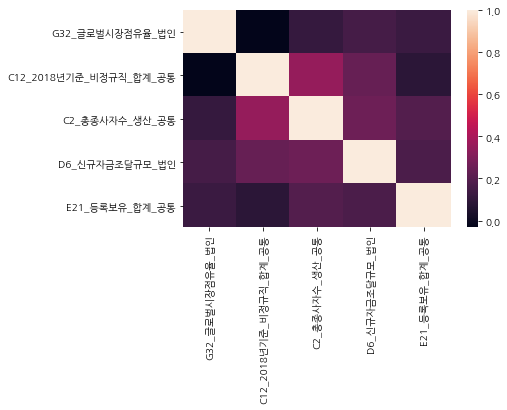

In [121]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [122]:
re=a.corr(method='pearson')
print(re)

                        G32_글로벌시장점유율_법인  C12_2018년기준_비정규직_합계_공통  \
G32_글로벌시장점유율_법인                1.000000               -0.032059   
C12_2018년기준_비정규직_합계_공통        -0.032059                1.000000   
C2_총종사자수_생산_공통                 0.116562                0.352923   
D6_신규자금조달규모_법인                 0.154684                0.239191   
E21_등록보유_합계_공통                 0.127307                0.086281   

                        C2_총종사자수_생산_공통  D6_신규자금조달규모_법인  E21_등록보유_합계_공통  
G32_글로벌시장점유율_법인               0.116562        0.154684        0.127307  
C12_2018년기준_비정규직_합계_공통        0.352923        0.239191        0.086281  
C2_총종사자수_생산_공통                1.000000        0.254958        0.192187  
D6_신규자금조달규모_법인                0.254958        1.000000        0.171084  
E21_등록보유_합계_공통                0.192187        0.171084        1.000000  


In [127]:
y,x=dmatrices('G32_글로벌시장점유율_법인~C12_2018년기준_비정규직_합계_공통+C2_총종사자수_생산_공통+D6_신규자금조달규모_법인+E21_등록보유_합계_공통',data,return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,VIF Factor,features
0,1.330301,Intercept
1,1.124443,C12_2018년기준_비정규직_합계_공통
2,1.180857,C2_총종사자수_생산_공통
3,1.119000,D6_신규자금조달규모_법인
4,1.078477,E21_등록보유_합계_공통


In [66]:
a = data[['growth','B28_창업시관련분야실무경험년수_공통','B29_창업주과거창업경험여부_공통','C11_2018년기준_정규직_합계_공통','C12_2018년기준_비정규직_합계_공통','C13_2018년기준_총종사자_합계_공통','C2_총종사자수_관리_공통','C4_예상신규채용_2020년_채용인원_공통']]

In [67]:
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

ValueError: zero-size array to reduction operation minimum which has no identity

In [76]:
a = data[['growth','C2_총종사자수_영업_공통','D1_지분_창업자_법인','D1_지분_임직원_법인','C2_총종사자수_합계_공통','D7_투자액_합계_법인','C3_학력별인력구성비_석사_법인','C3_학력별인력구성비_박사_법인','D51_RnD_경험여부_공통','C41_신규채용희망학력_합계_법인','G31_국내시장점유율_법인','E1_공통_4차산업혁명과관계여부_공통','B28_창업시관련분야실무경험년수_공통','C2_총종사자수_관리_공통','I3_밴처캐피탈투자받은경험_법인','I5_인수합병응할의향_법인','G32_글로벌시장점유율_법인','C12_2018년기준_비정규직_합계_공통','C2_총종사자수_생산_공통','D6_신규자금조달규모_법인','E21_등록보유_합계_공통']]



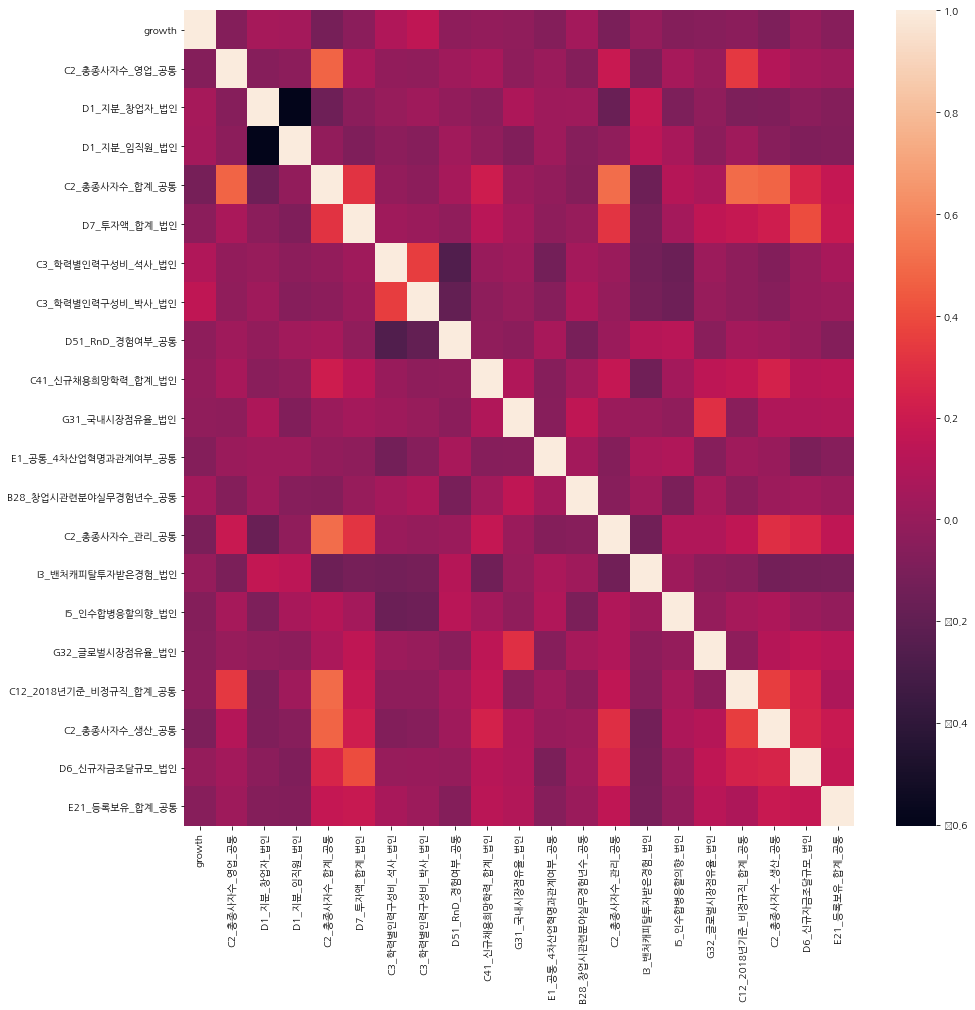

In [79]:
plt.figure(figsize=(15,15))
corrMatrix=a.corr()
sns.heatmap(corrMatrix)

In [5]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#로지스틱 회귀모델을 실행하기 위해 패키지를 설치

In [9]:
pd

<module 'pandas' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [44]:
data['E1_공통_4차산업혁명과관계여부_공통']

0       2
1       2
2       2
3       2
4       2
       ..
1708    1
1709    1
1710    1
1711    1
1712    1
Name: E1_공통_4차산업혁명과관계여부_공통, Length: 1713, dtype: int64

In [45]:
data['E1_공통_4차산업혁명과관계여부_공통']=data['E1_공통_4차산업혁명과관계여부_공통'].map({1:1,2:0})

In [ ]:
#범주형 자료 4차산업혁명과관계여부는 1과2로 이루어진 범주형 자료를 1과0으로 변환 실행

In [46]:
data['E1_공통_4차산업혁명과관계여부_공통']

0       0
1       0
2       0
3       0
4       0
       ..
1708    1
1709    1
1710    1
1711    1
1712    1
Name: E1_공통_4차산업혁명과관계여부_공통, Length: 1713, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [ ]:
#train set와 test set을 구분하고 검정하기 위해 필요한 패키지를 설치

In [48]:
features=data[['B28_창업시관련분야실무경험년수_공통','C2_총종사자수_관리_공통','D51_RnD_경험여부_공통','E21_등록보유_합계_공통','I3_밴처캐피탈투자받은경험_법인','I5_인수합병응할의향_법인']]
survival=data['E1_공통_4차산업혁명과관계여부_공통']

In [49]:
str(features)

'      B28_창업시관련분야실무경험년수_공통  C2_총종사자수_관리_공통  D51_RnD_경험여부_공통  E21_등록보유_합계_공통  \\\n0                        5               8                2               5   \n1                        0              10                2               4   \n2                        5              18                2               0   \n3                       17              28                1              49   \n4                       15               2                2              11   \n...                    ...             ...              ...             ...   \n1708                    21              21                2              41   \n1709                    16               2                2               2   \n1710                     3               4                1              26   \n1711                     4               1                2               5   \n1712                    15               1                2               0   \n\n      I3_밴처캐피탈투자받은경험_법인  I5_인수합병응할의향

In [50]:
train_features,test_features,train_labels,test_labels=train_test_split(features,survival)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [ ]:
#로지스틱 회귀모델을 실시하기 위해 정규화를 실행


In [53]:
train_feature=scaler.fit_transform(train_features)
test_feature=scaler.transform(test_features)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
data.dropna(thresh=2)

,Unnamed: 0,Unnamed: 0.1,순번,개인법인구분_공통,가중치_공통,[쿼터]업종_공통,[쿼터]종사자_공통,[쿼터]지역_공통,[쿼터]기업성장단계_공통,[쿼터]업력_공통,...,K48_업계내의과당경쟁및덤핑애로_공통,K49_법률회계세무관련지식부족애로_공통,K410_조직관리애로_공통,K411_환율변동애로_공통,K412_특허분쟁애로_공통,K413_각종규제애로_공통,K414_산·학·연간협력활동애로_공통,K415_불공정한시장질서애로_공통,ROE,growth
0,3,3,4,법인,1.831,9,5,2,4,4,...,3,4,3,3,3,3,3,3,3.592233,0.194523
1,7,7,8,법인,3.294,7,5,1,3,3,...,3,3,3,3,3,3,3,3,7.759189,0.273799
2,10,10,11,법인,1.707,8,5,1,3,3,...,4,3,3,3,3,3,3,3,22.383757,0.303955
3,11,11,12,법인,9.188,9,3,1,2,3,...,3,3,3,4,3,4,3,3,-20.508566,0.264120
4,13,13,14,법인,46.129,1,1,1,4,3,...,4,4,4,4,4,4,4,4,2.862736,0.274654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,2042,2042,2043,법인,3.895,2,4,1,1,2,...,3,3,5,2,3,5,5,2,-17.731516,0.788606
1709,2044,2044,2045,법인,34.316,7,2,2,4,2,...,4,2,3,1,1,5,3,5,31.796284,0.442075
1710,2046,2046,2047,법인,8.861,2,2,1,1,1,...,3,3,3,3,3,3,3,3,-89.020619,1.654572
1711,2048,2048,2049,법인,54.391,8,1,3,2,2,...,3,4,3,2,2,2,3,2,42.424242,0.383066


In [56]:
data=data.dropna(axis=0)

In [ ]:
#결측값이 있으면 로지스틱 회귀모델이 실행되지 않으므로 Dropna를 실행

In [57]:
data.dropna(thresh=2)

,Unnamed: 0,Unnamed: 0.1,순번,개인법인구분_공통,가중치_공통,[쿼터]업종_공통,[쿼터]종사자_공통,[쿼터]지역_공통,[쿼터]기업성장단계_공통,[쿼터]업력_공통,...,K48_업계내의과당경쟁및덤핑애로_공통,K49_법률회계세무관련지식부족애로_공통,K410_조직관리애로_공통,K411_환율변동애로_공통,K412_특허분쟁애로_공통,K413_각종규제애로_공통,K414_산·학·연간협력활동애로_공통,K415_불공정한시장질서애로_공통,ROE,growth


In [60]:
5print(model.score(train_features,train_labels))

0.5661993769470405


In [ ]:
#train set에 관해서 모델의 정확도를 확인

In [80]:
print(model.score(test_features,test_labels))

0.6037296037296037


In [ ]:
#test set에 관해서 모델의 정확도를 확인

In [58]:
model=LogisticRegression()
model.fit(train_features,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
print(model.coef_)

[[-0.00913079  0.00601888 -0.26436016  0.00269991 -0.33661272 -0.51180315]]


In [ ]:
#로지스틱 회귀모델의 회귀계수를 확인
